In [2]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [3]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../../")
import utils.utils as uti

### Import data from WA

In [4]:
# Path to the uploaded CSV file and upload it
from corpus_preprocessing.preprocessWA import remove_extra_rows_WA
df_filtered_wa, conduct_cols  = remove_extra_rows_WA()
df_filtered_wa['rule16'] = np.nan

# preprocessor = uti.TextPreprocessor(method='lemmatization')
# df_filtered_wa['Description'] = df_filtered_wa['Description'].apply(preprocessor.preprocess)
# df_filtered_wa.to_csv("./data_fully_preprocessed/wa_state.csv")

Percentage of samples kept: 69.48%


### Import data from NJ

In [5]:
from corpus_preprocessing.preprocessNJ import remove_extra_rows_NJ, extract_labels_rpc_NJ
df_filtered_nj = remove_extra_rows_NJ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nj.columns.values)):
    df_filtered_nj[str(i)+"_empty"] = np.nan
df_filtered_nj.columns = df_filtered_wa.columns.values

# df_filtered_nj['Description'] = df_filtered_nj['Description'].apply(preprocessor.preprocess)
# df_filtered_nj.to_csv("./data_fully_preprocessed/nj_state.csv")

Percentage of samples kept: 11.99%


### Import data from GA

In [6]:
from corpus_preprocessing.preprocessGA import remove_extra_rows_GA
df_filtered_ga = remove_extra_rows_GA()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_ga.columns.values)):
    df_filtered_ga[str(i)+"_empty"] = np.nan
df_filtered_ga.columns = df_filtered_wa.columns.values

# df_filtered_ga['Description'] = df_filtered_ga['Description'].apply(preprocessor.preprocess)
# df_filtered_ga.to_csv("./data_fully_preprocessed/ga_state.csv")

Percentage of rows kept: 57.32% 1042


### Import data from AZ

In [7]:
from corpus_preprocessing.preprocessAZ import preprocess_AZ
df_filtered_az = preprocess_AZ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_az.columns.values)):
    df_filtered_az[str(i)+"_empty"] = np.nan
df_filtered_az.columns = df_filtered_wa.columns.values

# df_filtered_az['Description'] = df_filtered_az['Description'].apply(preprocessor.preprocess)
# df_filtered_az.to_csv("./data_fully_preprocessed/az_state.csv")

Percentage of rows kept: 96.77%


### Import data from NC

In [8]:
from corpus_preprocessing.preprocessNC import preprocess_NC
df_filtered_nc = preprocess_NC()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nc.columns.values)):
    df_filtered_nc[str(i)+"_empty"] = np.nan
df_filtered_nc.columns = df_filtered_wa.columns.values

# df_filtered_nc['Description'] = df_filtered_nc['Description'].apply(preprocessor.preprocess)
# df_filtered_nc.to_csv("./data_fully_preprocessed/nc_state.csv")

Percentage of rows kept: 67.36% 1515


### Import data from MD

In [9]:
from corpus_preprocessing.preprocessMD import preprocess_MD
df_filtered_md = preprocess_MD()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_md.columns.values)):
    df_filtered_md[str(i)+"_empty"] = np.nan
df_filtered_md.columns = df_filtered_wa.columns.values

Percentage of rows kept: 10.95% 88


### Combine the data from the states into one DataFrame

In [10]:
df_all_states = pd.concat([df_filtered_wa.reset_index(drop=True), df_filtered_nj,
df_filtered_ga ,df_filtered_az, df_filtered_nc, df_filtered_md], axis=0, ignore_index=True)
df_all_states

,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,"John A. Walsh (WSBA No. 20603, admitted 1991),...",3.4,8.4d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Louis A. Ferreira (WSBA No. 20646, admitted 19...",1.2,1.8,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Roland O. Foster Balloun (WSBA No. 20884, admi...",1.1,1.14,1.15,1.8,1.8,3.3,3.4,4.4,8.4c,8.4d,8.4l,NaN,NaN,NaN,NaN,NaN
3,"Thomas G. Batson (WSBA No. 20888, admitted 199...",1.14,8.4c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Kevin G. Healy (WSBA No. 16307, admitted 1986)...",1.8,1.8,8.4c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,"july 21, 2009 by the court of appeals based on...",1.1,1.15,5.1,5.3,8.4,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4551,"the court of appeals on april 28, 2009 for lac...",1.3,3.2,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4552,for failure to appear at his client’s hearing....,1.3,8.4,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4553,"july 21, 2009 by the court of appeals based on...",1.1,1.15,8.4,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


### Find unique labels in the whole dataset

In [11]:
unique_conducts = np.sort(pd.Series(df_all_states[conduct_cols].values.ravel()).dropna().unique())
print((unique_conducts), len(unique_conducts))

['1.1' '1.10' '1.11' '1.12' '1.13' '1.14' '1.15' '1.15A' '1.15B' '1.16'
 '1.17' '1.2' '1.3' '1.4' '1.5' '1.6' '1.7' '1.8' '1.9' '2.1' '2.2' '2.3'
 '2.4' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4.1' '4.2'
 '4.2.' '4.3' '4.4' '5.1' '5.2' '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '6.1'
 '6.2' '6.3' '6.4' '6.5' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6' '8.1' '8.2'
 '8.4' '8.4 (a)' '8.4 (b)' '8.4 (c)' '8.4 (d)' '8.4a' '8.4b' '8.4c' '8.4d'
 '8.4e' '8.4h' '8.4i' '8.4j' '8.4k' '8.4l' '8.4m' '8.4n' '8.5'] 76


### Group the labels into 10 bins

In [12]:
dict_unique_conducts = {"1.1":1, "1.3":1, 
        "1.15":2, "1.15a":2, "1.15 (a)":2, "1.15A":2, "1.15 (A)":2,"1.15b":2,"1.15 (b)":2, "1.15B":2, "1.15 (B)":2,
        "1.4":3,
        "1.7":4, "1.8":4, "1.10":4, "1.11":4, "1.16":4, "1.17":4,
        "1.2":5, "1.5":5, "1.6":5, '1.9':5, "1.12":5, '1.13':5, '1.14':5,
        "2.1":6, "2.2":6, "2.3":6, "2.4":6, "3.1":6, "3.2":6, "3.3":6, "3.4":6, "3.5":6, "3.6":6, "3.7":6, "3.8":6, "3.9":6,
        "4.1":7, "4.2":7, "4.2.":7, "4.3":7, "4.4":7, "5.1":7, "5.2":7, "5.3":7, "5.4":7, "5.5":7, "5.6":7, "5.7":7,"5.8":7,
         "6.1":7, "6.2":7, "6.3":7, "6.4":7, "6.5":7, "7.1":7, "7.2":7, "7.3":7, "7.4":7, "7.5":7,"7.6":7,
        "8.4b":8, '8.4 (b)':8,
        "8.4c":9, '8.4 (c)':9,
        '8.1':10, '8.2':10, '8.4':10, '8.4a':10, '8.4 (a)':10, '8.4d':10, '8.4 (d)':10, '8.4e':10, '8.4 (e)':10, '8.4h':10, 
        '8.4 (h)':10, '8.4i':10, '8.4 (i)':10, '8.4j':10, '8.4 (j)':10, '8.4k':10, '8.4 (k)':10, '8.4l':10, '8.4 (l)':10, '8.4m':10, '8.4 (m)':10,
         '8.4n':10, '8.4 (n)':10, '8.5':10}

# from clusters_to_bins import clusters_to_bins
# dict_unique_conducts = clusters_to_bins("cluster_sums.csv")

### Replace labels by corresponding bin identificators

In [13]:
unique_bins = list(set(dict_unique_conducts.values()))
df_all_states = df_all_states.replace(dict_unique_conducts)
df_all_states

/var/folders/sv/qn9ckc8d6bs84hdk8qfbjcgh0000gn/T/ipykernel_85275/3471764644.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all_states = df_all_states.replace(dict_unique_conducts)


,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,"John A. Walsh (WSBA No. 20603, admitted 1991),...",6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Louis A. Ferreira (WSBA No. 20646, admitted 19...",5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Roland O. Foster Balloun (WSBA No. 20884, admi...",1.0,5.0,2.0,4.0,4.0,6.0,6.0,7.0,9.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN
3,"Thomas G. Batson (WSBA No. 20888, admitted 199...",5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Kevin G. Healy (WSBA No. 16307, admitted 1986)...",4.0,4.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,"july 21, 2009 by the court of appeals based on...",1.0,2.0,7.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4551,"the court of appeals on april 28, 2009 for lac...",1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4552,for failure to appear at his client’s hearing....,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4553,"july 21, 2009 by the court of appeals based on...",1.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# unique_conducts = pd.Series(df_all_states[conduct_cols].values.ravel()).dropna().unique()
# print((unique_conducts), len(unique_conducts))

### Preprocess Descriptions and extract embeddings

In [15]:
# import bert_classification as bert
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [16]:
# Set up the device 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.to(device)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

### Extract embeddings (if haven't done before)

In [ ]:
# Preprocess data by converting text to lowercase, removing non-word characters and numbers, 
# excluding the specific word 'wsba', exclude single characters, tokenizing, removing stopwords, and applying lemmatization or stemming if method = "stemming"

preprocessor = uti.TextPreprocessor(method='lemmatization')
preprocessed_descriptions = df_all_states['Description'].apply(preprocessor.preprocess)


states = ["WA", "NJ", "GA", "AZ", "NC", "MD"]
import math

batch_size = 128*3

embeddings = []
preprocessor = uti.TextPreprocessor(method='lemmatization')

preprocessed_description = df_all_states['Description'].apply(preprocessor.preprocess)
full_out=np.zeros((len(preprocessed_description.to_list()), 768))#data count, embedding size
for i in range(math.ceil(len(preprocessed_description.to_list())/batch_size)):
    data=tokenizer(preprocessed_description.to_list()[i*batch_size:(i+1)*batch_size],padding='max_length',truncation=True,max_length=256,return_tensors="pt")
    #print(data)
    with torch.no_grad():
        out=model(**data)
    full_out[i*batch_size:(i+1)*batch_size]=out.last_hidden_state.mean(dim=1)
    del data
    del out
    np.save("./embeddings/all_embedding.npy", full_out)
    embeddings.append(full_out)

### Load embeddings if already done

In [19]:
#embeddings = []
#preprocessor = uti.TextPreprocessor(method='lemmatization')

    
#embeddings.append(np.load("./embeddings/all_embedding.npy"))
#preprocessed_description = df_all_states['Description'].apply(preprocessor.preprocess)

In [ ]:
print(len(np.array(embeddings)[0]))

4555


### Classification using BERT

In [ ]:
import embeddings_bert as bert
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
from sklearn.metrics import accuracy_score


In [ ]:
# Set up parameters
bert_model_name = 'bert-base-uncased'
num_classes = 2
max_length = 128
batch_size = 128
learning_rate = 1e-4

class Net(nn.Module):
    """
    The model class, which defines our classifier.
    """
    def __init__(self):
        """
        The constructor of the model.
        """
        super().__init__()
        self.fc1 = nn.Linear(768, 384)
        self.fc1_bn = nn.BatchNorm1d(384)
        self.fc1_drop = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(384, 192)
        self.fc2_bn = nn.BatchNorm1d(192)
        self.fc2_drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(192, 2)

    def forward(self, x):
        """
        The forward pass of the model.

        input: x: torch.Tensor, the input to the model

        output: x: torch.Tensor, the output of the model
        """
        x = nn.functional.relu(self.fc1_bn(self.fc1(x)))
        x = self.fc1_drop(x)
        x = nn.functional.relu(self.fc2_bn(self.fc2(x)))
        x = self.fc2_drop(x)
        x = self.fc3(x)
        return x

In [ ]:
import matplotlib.pyplot as plt
from pytorchtools import EarlyStopping


In [ ]:
n_epochs = 3000
learning_rate = 1e-6
patience = 30


scores = np.zeros([len(unique_bins)])
freq_label = np.zeros([len(unique_bins)])



for j, label in enumerate(unique_bins):
    mask_test = df_all_states[conduct_cols].isin([label])
    test_with_label = df_all_states[mask_test].dropna(how='all').index.values.tolist()
    test_without_label = np.setdiff1d(np.array(df_all_states.index),np.array(test_with_label))


    # frequency of label in TESTING set 
    freq_label[j] = len(test_with_label)/(len(test_with_label) + len(test_without_label))

    y_train = pd.DataFrame(np.append(np.ones(len(test_with_label)), np.zeros(len(test_without_label))),index = np.append(test_with_label, test_without_label))
    X_train1, x_test, y_train1, y_test = train_test_split(embeddings[0], y_train, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

    # print(embedding.shape, y_test.shape)
    train_dataset = TensorDataset(torch.from_numpy(x_train).type(torch.float),
                            torch.from_numpy(y_train.to_numpy()).type(torch.float))
    
    test_dataset = TensorDataset(torch.from_numpy(x_test).type(torch.float),
                                    torch.from_numpy(y_test.to_numpy()).type(torch.float))
    
    val_dataset = TensorDataset(torch.from_numpy(x_valid).type(torch.float),
                                    torch.from_numpy(y_valid.to_numpy()).type(torch.float))
    
    train_loader = DataLoader(dataset=train_dataset,
                            batch_size=1024,
                            shuffle=True,
                            pin_memory=True, num_workers=8)
    test_loader = DataLoader(dataset=test_dataset,
                            batch_size=1024,
                            shuffle=False,
                            pin_memory=True, num_workers=8)
    val_loader = DataLoader(dataset=val_dataset,
                            batch_size=1024,
                            shuffle=False,
                            pin_memory=True, num_workers=8)
    # del x_train



    model = Net() 

    # criterion = nn.BCEWithLogitsLoss()
    # criterion_val = nn.BCEWithLogitsLoss()

    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    training_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2048*2)
    validation_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2048)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2048)


    # Training the model
    test_accuraces = []
    train_losses = []
    val_losses = []
    val_accuraces = []
    early_stopping = EarlyStopping(patience=patience, verbose=False)
    for k, epoch in enumerate(range(n_epochs)):
        # print(f"Epoch: {epoch + 1}/{n_epochs}")
        model.train()
        train_loss = []
        val_loss = []
        test_accuracy = []
        val_accuracy = []
        for [X, y] in training_loader:
            # zero the parameter gradients
            #print(len(X))
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = model(X)
            y = y.type(torch.LongTensor)
            loss = nn.CrossEntropyLoss()(outputs, y.squeeze(1))
            train_loss.append(loss.item())
            loss.backward()
            optimizer.step()
        
        model.eval() 
        with torch.no_grad():
            valid_loss = 0.0
            for [X, y] in validation_loader:
                # forward 
                # print(X.shape, y.shape)
                outputs = model(X)
                _, preds = torch.max(outputs, dim=1)
                y = y.type(torch.LongTensor)
                accuracy = accuracy_score(y, preds)
                val_accuracy.append(accuracy)
                loss = nn.CrossEntropyLoss()(outputs, y.squeeze(1))
                val_loss.append(loss.item())
        val_accuraces.append(np.average(val_accuracy))
        train_losses.append(np.average(train_loss))
        val_losses.append(np.average(val_loss))
        early_stopping(val_losses[-1], model)
        
        # if early_stopping.early_stop:
        #     print("Early stopping: ", k)
        #     break
        if val_accuraces[-1] > 0.6:
            learning_rate = 1e-7
            optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
        # print(f"Accuracy: {val_accuracy[-1]}",f"Val: {val_losses[-1]}", f"Train: {train_losses[-1]}")
    # plt.figure()
    # plt.plot(val_losses, label="test loss")
    # plt.plot(train_losses, label="train loss")
    # plt.legend()
    # plt.show()
    for [X, y] in test_loader:
        # forward 
        # print(X.shape, y.shape)
        outputs = model(X)
        _, preds = torch.max(outputs, dim=1)
        y = y.type(torch.LongTensor)
        accuracy = accuracy_score(y, preds)
        test_accuracy.append(accuracy)
    test_accuraces.append(np.average(test_accuracy))

    scores[j] = test_accuraces[-1]
    print(scores)



[0.81888035 0.8079034  0.76289791 0.56421515 0.8079034  0.77058178
 0.79034029 0.84632272 0.79473106 0.79253568]


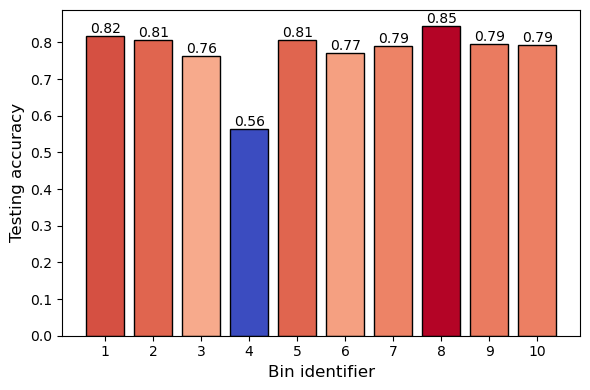

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(6, 4))

# Create bar plot
colors = cm.coolwarm((np.array(scores) - min(scores)) / (max(scores) - min(scores)))
bars = ax.bar(unique_bins, scores, color=colors, edgecolor='black')

# Add labels and title
ax.set_xlabel('Bin identifier', fontsize=12)
ax.set_ylabel('Testing accuracy', fontsize=12)

# Add gridlines


# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

ax.set_xticks(np.arange(len(unique_bins))+1) 
ax.set_xticklabels(unique_bins)
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
np.mean(scores)

0.7894621295279911

### Accuracy estimation of the BERT model

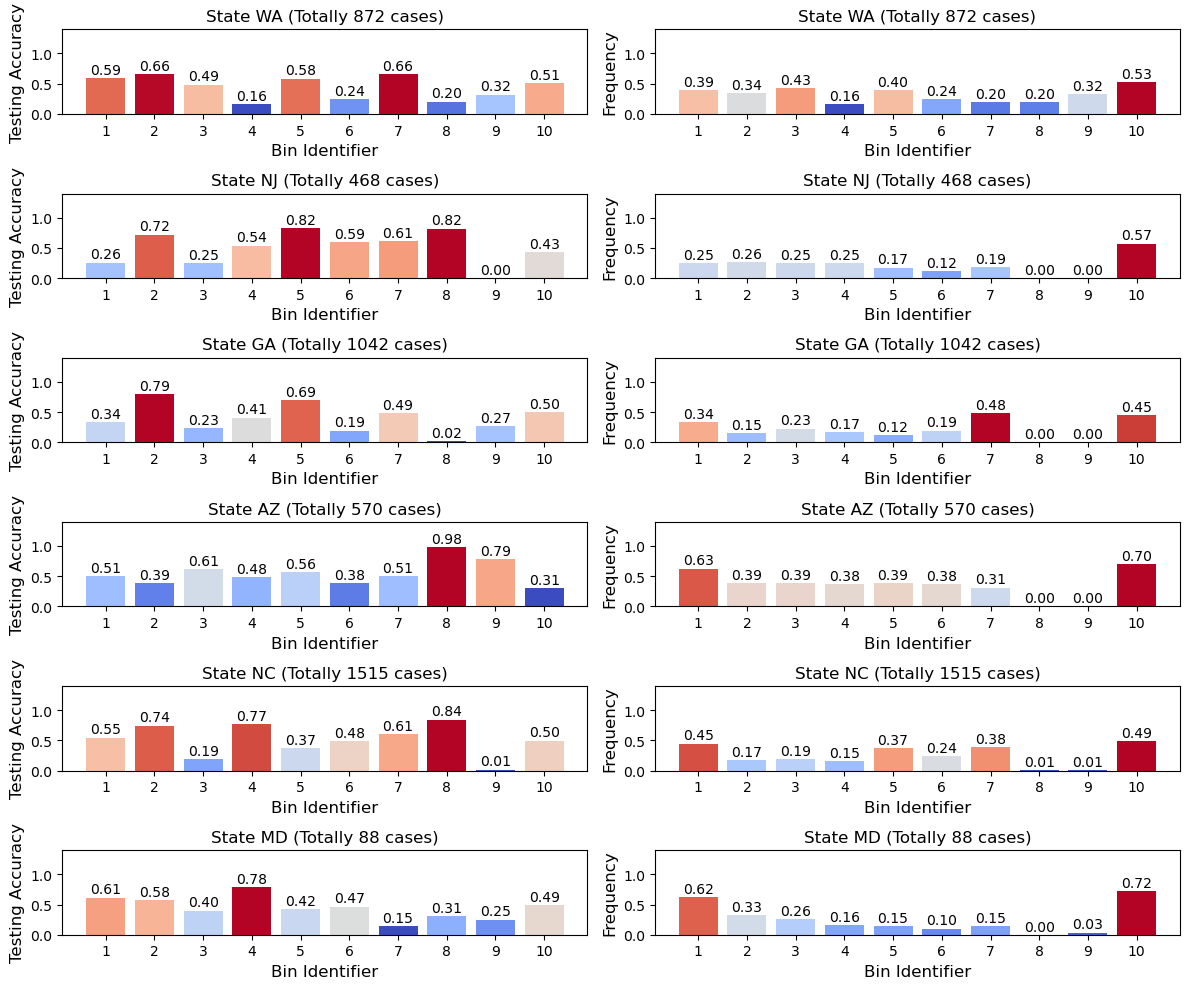

In [ ]:
# Create a new figure with two subplots (side by side) including the exact frequency labels on top
import matplotlib.pyplot as plt

import matplotlib.cm as cm



fig, ax = plt.subplots(len(df_all_states), 2, figsize=(12, 10))

for i,_ in enumerate(df_all_states):
    score = scores[i, :]
    colors = cm.coolwarm((score - min(score)) / (max(score) - min(score)))

    # Plot the original histogram with gradient colors (first subplot)
    ax[i,0].bar(unique_bins, score, color=colors, width=0.8, align='center')
    ax[i,0].set_xlabel("Bin Identifier", fontsize=12)
    ax[i,0].set_ylabel("Testing Accuracy", fontsize=12)
    ax[i,0].set_ylim(0, 1.4)
    ax[i,0].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    ax[i,0].set_title("State " + states[i] + " (Totally " + str(len(df_all_states[i]))+ " cases)")
    # Display the exact height above each bar
    for j, value in enumerate(score):
        ax[i,0].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Plot the new histogram with frequency (second subplot)
    colors = cm.coolwarm((freq_label[i, :] - min(freq_label[i, :])) / (max(freq_label[i, :]) - min(freq_label[i, :])))
    ax[i,1].bar(unique_bins, freq_label[i, :], color=colors, width=0.8, align='center')
    ax[i,1].set_xlabel("Bin Identifier", fontsize=12)
    ax[i,1].set_ylabel("Frequency", fontsize=12)
    ax[i,1].set_ylim(0, 1.4)
    ax[i,1].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    ax[i,1].set_title("State " + states[i] + " (Totally " + str(len(df_all_states[i]))+ " cases)")

    
    # Display the exact frequency above each bar
    for j, value in enumerate(freq_label[i, :]):
        ax[i,1].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Display the plot with both subplots

    plt.tight_layout()
plt.show()  # Show the complete plot with two subplots, with exact frequencies